In [1]:
import spacy
nlp = spacy.load('en_core_web_md')

In [3]:
doc=nlp('word')
doc.vector.shape

(300,)

In [4]:
nlp('lion eats cats scared of dog').vector# here vector is avg ofall the token vector in doc

array([-2.03135669e-01, -3.60189974e-02, -7.74588287e-02, -3.42801690e-01,
       -2.20378160e-01,  2.75669158e-01, -4.14913334e-02, -1.42809674e-01,
        1.63560048e-01,  1.86016667e+00, -3.46698314e-01,  3.67650017e-02,
       -2.65586853e-01,  3.47943343e-02, -1.97822466e-01,  1.29115671e-01,
        7.58998394e-02,  7.13874638e-01, -2.06530020e-01, -1.06160454e-01,
       -2.38615498e-01, -2.50438321e-02, -1.93375006e-01, -3.21393311e-01,
       -9.13071632e-02, -1.97719827e-01, -9.94733274e-02, -2.25086570e-01,
        1.12683333e-01, -2.17999339e-01, -3.22485030e-01,  3.49790007e-02,
       -9.77936685e-02,  9.30306688e-02,  2.16125503e-01,  1.12801492e-01,
        2.19261646e-01, -2.70021647e-01, -2.48775408e-01,  2.27305174e-01,
        6.06121607e-02,  7.15763345e-02, -1.42155439e-01,  2.91303340e-02,
        2.10482314e-01, -6.75566643e-02, -2.21425831e-01,  1.76633835e-01,
       -1.85433328e-02, -5.50761335e-02, -1.57884985e-01,  3.90678346e-02,
       -9.35880020e-02, -

In [5]:
tokens=nlp('lion cat pet')#lionand cat are similar, cat are pets
for t1 in tokens:
    for t2 in tokens:
        print(t1.text,t2.text,t1.similarity(t2))

lion lion 1.0
lion cat 0.5265438
lion pet 0.39923766
cat lion 0.5265438
cat cat 1.0
cat pet 0.7505457
pet lion 0.39923766
pet cat 0.7505457
pet pet 1.0


In [6]:
#words used in similar context but have opposoure meaning  ,have similar vectors
tokens=nlp('like love hate')
for t1 in tokens:
    for t2 in tokens:
        print(t1.text,t2.text,t1.similarity(t2))

like like 1.0
like love 0.657904
like hate 0.65746516
love like 0.657904
love love 1.0
love hate 0.63930994
hate like 0.65746516
hate love 0.63930994
hate hate 1.0


In [7]:
nlp.vocab.vectors.shape

(20000, 300)

In [8]:
tokens=nlp('dog cat Chinmay')
for tok in tokens:
    print(tok.text,tok.has_vector,tok.is_oov,tok.vector_norm)

dog True False 7.0336733
cat True False 6.6808186
Chinmay False True 0.0


In [9]:
#cosine similarity
#used to calculate the similaruty between two  vectors,if angle is small high similaroty,or low similarity othrerwise
#cosine formula return distance ,1-cosine dist

#np.dot(vect1,vect2)/((np.linalg.norm(vect1))*(np.linalg.norm(vect1)))

In [10]:
from scipy import spatial
cosine_similarity=lambda vect1,vect2:1-spatial.distance.cosine(vect1,vect2)

In [11]:
#we will find vector close/similar to queen
new_vect=nlp.vocab['queen'].vector
computed=[]
#search in  whole vocab to find similar vector
for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similar=cosine_similarity(new_vect,word.vector)
                computed.append((word,similar))

In [12]:
sorted_lst=sorted(computed,key=lambda x:-x[1])

In [13]:
for lst in sorted_lst[:10]:
    print(lst[0].text)

queen
queens
empresses
duchesses
king
pricess
princess
princesses
mermaid
commoner


In [14]:
#word simmilar to queen are queens,empress,duchesses,king,princess

In [34]:
from  sklearn.decomposition import PCA 
def get_word_vectors(words):
    return [nlp(word).vector for word in words]

words=['cat','dog','bat','monkey',"lion",'king','queen','man']
pca=PCA(n_components=2)
word_vector_2d=pca.fit_transform(get_word_vectors(words))

In [35]:
word_vector_2d

array([[-2.67829223, -2.42825819],
       [-3.24934681, -2.62878318],
       [-1.54837984,  5.32237119],
       [-1.22296727,  0.696861  ],
       [-0.17973837, -0.39335271],
       [ 4.60916496, -0.64512959],
       [ 4.30519613, -0.70184597],
       [-0.03563657,  0.77813745]])

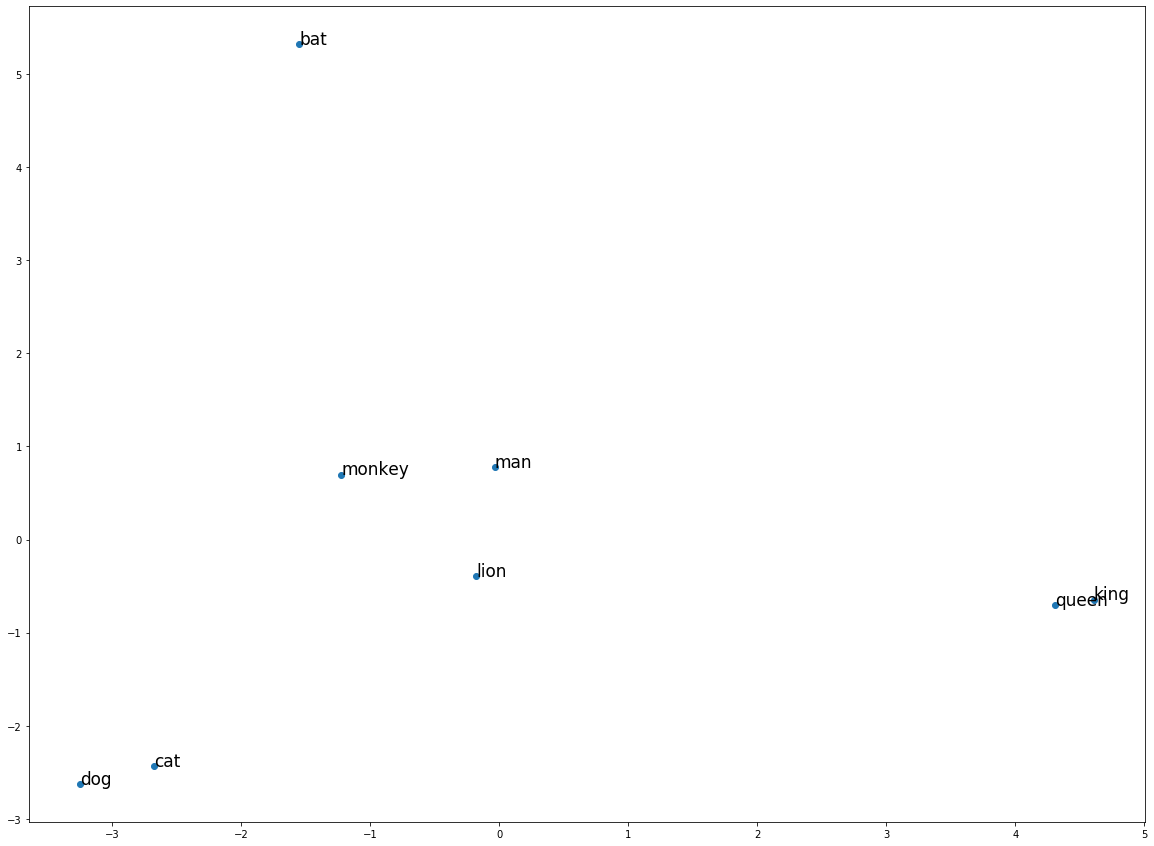

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,15))

plt.scatter(word_vector_2d[:,0],word_vector_2d[:,1])
for  cord , word in zip(word_vector_2d,words):
    x=cord[0]
    y=cord[1]
    plt.text(x,y,word,size=17)

In [ ]:
pd.read_csv()